In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
from sklearn.tree import  DecisionTreeClassifier
import matplotlib.pyplot as plt

customer_type = pd.read_csv("C:\\Users\\kp\\Pictures\\Assignments\\Decision Trees\\Fraud_check.csv",header=0)
customer_category=[]

for value in customer_type['Taxable.Income']:
    if (value <= 30000) :
        customer_category.append('Risky')
    else:
        customer_category.append('Good')

modified_customer_type=customer_type.drop(['Taxable.Income'],axis=1)
modified_customer_type['Taxable.Income']=pd.Series(customer_category)

encoder=preprocessing.LabelEncoder()
modified_customer_type['Undergrad']=encoder.fit_transform(modified_customer_type['Undergrad'])
modified_customer_type['Marital.Status']=encoder.fit_transform(modified_customer_type['Marital.Status'])
modified_customer_type['Urban']=encoder.fit_transform(modified_customer_type['Urban'])

features=modified_customer_type.columns[0:5]
output=modified_customer_type.columns[5]
modified_customer_type

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good
...,...,...,...,...,...,...
595,1,0,39492,7,1,Good
596,1,0,55369,2,1,Good
597,0,0,154058,0,1,Good
598,1,1,180083,17,0,Good


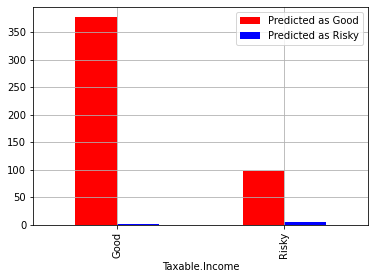

In [113]:
train_data,test_data = train_test_split(modified_customer_type,test_size = 0.2,random_state=8)

#Decision Tree Model Training and prediction
model_DT = DecisionTreeClassifier(criterion = 'entropy',max_depth = 4,min_samples_split=5)
model_DT.fit(train_data[features],train_data[output])
preds = model_DT.predict(test_data[features])

#Plot to analyse variation between the Predicted values and the Actual Values on Train Dataset

#pd.crosstab(train_data[output],model_DT.predict(train_data[features]))
pd.crosstab(train_data[output],model_DT.predict(train_data[features])).plot(kind='bar',color=['red','blue'], grid=True)
plt.legend(['Predicted as Good','Predicted as Risky'])
plt.show()

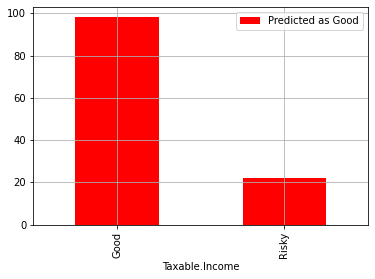

col_0           Good
Taxable.Income      
Good              98
Risky             22


In [114]:
#Plot to analyse variation between the Predicted values and the Actual Values on Test Dataset
pd.crosstab(test_data[output],preds).plot(kind='bar',color=['red','blue'], grid=True)
plt.legend(['Predicted as Good','Predicted as Risky'])
plt.show()
print(pd.crosstab(test_data[output],preds))

In [115]:
# Train Accuracy
print("Train Accuracy achieved by DT Algorithm(%): ",np.mean(train_data['Taxable.Income'] == model_DT.predict(train_data[features]))*100)

# Test Accuracy
print("Test Accuracy achieved by DT Algorithm(%): ",np.mean(preds==test_data['Taxable.Income'])*100)

Train Accuracy achieved by DT Algorithm(%):  79.375
Test Accuracy achieved by DT Algorithm(%):  81.66666666666667
